In [29]:
from numpy.core.fromnumeric import amin
import pandas as pd
from read_input import read_pdbs
import itertools
from itertools import product, combinations


native_pdb, fibril_pdb = read_pdbs()

# Make a dictionary from the pdb of resnum:resid from the pdb structure
pdb_resids = native_pdb.residues.resids.tolist()
amino_dict = dict(zip(pdb_resids,(list(native_pdb.residues.resnames))))
#print(amino_dict)

# Create the DataFrame of the pairs list
pairs_list = pd.read_csv('GRETA/output_TTR/pairs_list.txt', sep='\\s+')
pairs_list = pd.read_csv('GRETA/output_TTR/pairs_list_magros.txt', sep='\\s+')
pairs_list.insert(1, 'ai_resnumber', '')
pairs_list.insert(1, 'ai_resname', '')
pairs_list.insert(4, 'aj_resnumber', '')
pairs_list.insert(4, 'aj_resname', '')
pairs_list[['ai_resname', 'ai_resnumber']] = pairs_list.ai.str.split("_", expand = True)
pairs_list[['aj_resname', 'aj_resnumber']] = pairs_list.aj.str.split("_", expand = True)
pairs_list['ai_resname'] = pairs_list['ai_resnumber'].astype(int)
pairs_list['aj_resname'] = pairs_list['aj_resnumber'].astype(int)
pairs_list['ai_resnumber'] = pairs_list['ai_resnumber'].astype(int)
pairs_list['aj_resnumber'] = pairs_list['aj_resnumber'].astype(int)
pairs_list['ai_resname'] = pairs_list.ai_resname.map(amino_dict)
pairs_list['aj_resname'] = pairs_list.aj_resname.map(amino_dict)
#print(pairs_list)#.to_string())

# Create a list of unique values for counting
pairs_type = pairs_list.ai.unique()
pairs_combinations = list(itertools.combinations(pairs_type, 2))
#print(pairs_combinations) #ok




In [31]:
contacts_histogram = {}
for an in pdb_resids:
    is_an = (pairs_list['ai_resnumber'] == an) | (pairs_list['aj_resnumber'] == an)
    pairs_an = pairs_list[is_an]

    print(f'Total amount of contacts made by {amino_dict.get(an)}_{an}:', len(pairs_an))
    #print(pairs_an)
    pairs_an.loc[pairs_an['ai_resnumber'] == an, 'an_with_who'] = pairs_an['aj_resname'] + '_' + pairs_an['aj_resnumber'].astype(str)
    pairs_an.loc[pairs_an['ai_resnumber'] != an, 'an_with_who'] = pairs_an['ai_resname'] + '_' + pairs_an['ai_resnumber'].astype(str)

    #print(pairs_an)
    an_with_who = pairs_an.an_with_who.value_counts()
    contacts_histogram['{0}'.format(an)] = an_with_who.to_dict()
    print(an_with_who.to_string())

#print(contacts_histogram)

Total amount of contacts made by TYR_1: 257
SER_11    77
TYR_10    71
TYR_1     69
THR_2     36
ILE_3      4
Total amount of contacts made by THR_2: 169
TYR_1     36
TYR_10    35
THR_2     28
PRO_9     26
ILE_3     23
SER_11    21
Total amount of contacts made by ILE_3: 156
ILE_3     33
ALA_4     29
TYR_10    25
THR_2     23
SER_8     18
PRO_9     17
ALA_5      5
TYR_1      4
LEU_7      1
LEU_6      1
Total amount of contacts made by ALA_4: 103
ILE_3    29
LEU_7    20
PRO_9    18
ALA_5    16
ALA_4    15
SER_8     3
LEU_6     2
Total amount of contacts made by ALA_5: 84
LEU_6    32
ALA_4    16
ALA_5    15
LEU_7    15
ILE_3     5
SER_8     1
Total amount of contacts made by LEU_6: 135
LEU_7     49
LEU_6     36
ALA_5     32
SER_8      9
SER_11     6
ALA_4      2
ILE_3      1
Total amount of contacts made by LEU_7: 163
LEU_6     49
LEU_7     36
SER_8     21
ALA_4     20
ALA_5     15
SER_11    12
PRO_9      9
ILE_3      1
Total amount of contacts made by SER_8: 109
PRO_9     26
SER_8     21

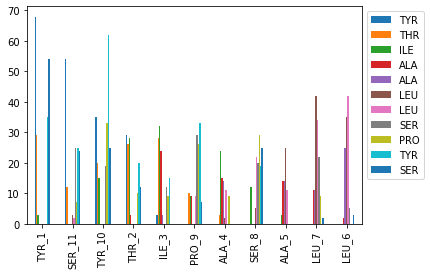

         TYR   THR   ILE   ALA   ALA   LEU   LEU   SER   PRO   TYR   SER
TYR_1   68.0  29.0   3.0   NaN   NaN   NaN   NaN   NaN   NaN  35.0  54.0
SER_11  54.0  12.0   NaN   NaN   NaN   3.0   2.0  25.0   7.0  25.0  24.0
TYR_10  35.0  20.0  15.0   NaN   NaN   NaN   NaN  19.0  33.0  62.0  25.0
THR_2   29.0  26.0  28.0   3.0   NaN   NaN   NaN   NaN  10.0  20.0  12.0
ILE_3    3.0  28.0  32.0  24.0   3.0   NaN   NaN  12.0   9.0  15.0   NaN
PRO_9    NaN  10.0   9.0   9.0   NaN   NaN   9.0  29.0  26.0  33.0   7.0
ALA_4    NaN   3.0  24.0  15.0  14.0   2.0  11.0   NaN   9.0   NaN   NaN
SER_8    NaN   NaN  12.0   NaN   NaN   5.0  22.0  20.0  29.0  19.0  25.0
ALA_5    NaN   NaN   3.0  14.0  14.0  25.0  11.0   NaN   NaN   NaN   NaN
LEU_7    NaN   NaN   NaN  11.0  11.0  42.0  34.0  22.0   9.0   NaN   2.0
LEU_6    NaN   NaN   NaN   2.0  25.0  35.0  42.0   5.0   NaN   NaN   3.0


In [26]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker
from matplotlib.colors import ListedColormap

histo_df = pd.DataFrame(contacts_histogram)
histo_df.columns = list(amino_dict.values())
histo_df.plot(kind = "bar", stacked = False)
plt.legend(loc = 'upper right', bbox_to_anchor = (1.2, 1))
plt.show()
print(histo_df)

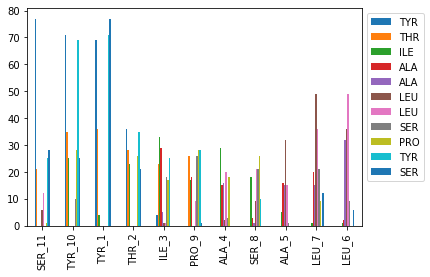

         TYR   THR   ILE   ALA   ALA   LEU   LEU   SER   PRO   TYR   SER
SER_11  77.0  21.0   NaN   NaN   NaN   6.0  12.0   NaN   1.0  25.0  28.0
TYR_10  71.0  35.0  25.0   NaN   NaN   NaN   NaN  10.0  28.0  69.0  25.0
TYR_1   69.0  36.0   4.0   NaN   NaN   NaN   NaN   NaN   NaN  71.0  77.0
THR_2   36.0  28.0  23.0   NaN   NaN   NaN   NaN   NaN  26.0  35.0  21.0
ILE_3    4.0  23.0  33.0  29.0   5.0   1.0   1.0  18.0  17.0  25.0   NaN
PRO_9    NaN  26.0  17.0  18.0   NaN   NaN   9.0  26.0  28.0  28.0   1.0
ALA_4    NaN   NaN  29.0  15.0  16.0   2.0  20.0   3.0  18.0   NaN   NaN
SER_8    NaN   NaN  18.0   3.0   1.0   9.0  21.0  21.0  26.0  10.0   NaN
ALA_5    NaN   NaN   5.0  16.0  15.0  32.0  15.0   1.0   NaN   NaN   NaN
LEU_7    NaN   NaN   1.0  20.0  15.0  49.0  36.0  21.0   9.0   NaN  12.0
LEU_6    NaN   NaN   1.0   2.0  32.0  36.0  49.0   9.0   NaN   NaN   6.0


In [32]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker
from matplotlib.colors import ListedColormap

histo_df = pd.DataFrame(contacts_histogram)
histo_df.columns = list(amino_dict.values())
histo_df.plot(kind = "bar", stacked = False)
plt.legend(loc = 'upper right', bbox_to_anchor = (1.2, 1))
plt.show()
print(histo_df)

In [ ]:
for an in pdb_resids:
    is_an = (pairs_list['ai_resnumber'] == an) | (pairs_list['aj_resnumber'] == an)
    pairs_an = pairs_list[is_an]

    print(f'Total amount of contacts made by {amino_dict.get(an)}_{an}:', len(pairs_an))
    #print(pairs_an)
    pairs_an.loc[pairs_an['ai_resnumber'] == an, 'an_with_who'] = pairs_an['aj_resname'] + '_' + pairs_an['aj_resnumber'].astype(str)
    pairs_an.loc[pairs_an['ai_resnumber'] != an, 'an_with_who'] = pairs_an['ai_resname'] + '_' + pairs_an['ai_resnumber'].astype(str)

    #print(pairs_an)
    an_with_who = pairs_an.an_with_who.value_counts()
    print(an_with_who)